# Homework 4


Before you run your homework run the code below:

In [19]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
from urllib.request import urlopen
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import glob
import re
from collections import Counter
assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [20]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [21]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)


In [22]:
SONAR = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data",sep=",",header=None)
SONAR.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


Split the tasks into subtasks and into separate cells.  Also before your analysis for each subtask, write a short paragraph before explaining which algorithm you are going to use. Each subtask should look like this

## Subtask 1 : K- Means








---> K-Means metodunu uygulamak için, gerekli parametlere ile atama yapıp model değişkenine bu parametreleri atadık. Bu modelimize Xtrain ismini verdik. K-Means datayı cluster'lara ayırıp ID verir.O ID değerlerini R ve M değerleri ile tahmin(predict) ile karşılaştırdık.

In [23]:
# datayi %25 test datasi olacak sekilde boluyoruz
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)
model = KMeans(n_clusters=2, random_state=0)
# model should be fit with train data
model.fit(Xtrain)
# predict with test data
predicted = model.predict(Xtest)
labels = {"R":1, "M":0}
# accuracy sonucu asagidaki durumda daha kotu bunun sebebi label'lari yanlis tahmin etmis olmamiz
# labels = {"R":0, "M":1}
real = Ytest.map(lambda x: labels[x])
accuracy = accuracy_score(real,predicted)
print(confusion_matrix(real,predicted))


print(accuracy)

[[12 13]
 [ 6 21]]
0.6346153846153846


---> K-Means unsupervised bir algoritma olduğundan kötü bir sonuç vermiştir.

## Subtask 2 : K-NN



---> K-Means'de yaptığımız işlemlerin benzerlerini burada yapıyoruz. Komşuluk değerinin tek olmasının sebebi daha iyi sonuç vermesidir.

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
print(cm)
accuracy = accuracy_score(Ytest,predicted)
print(accuracy)

[[25  3]
 [ 8 16]]
0.7884615384615384


---> K-NN supervised bir algoritma olduğunundan K-means'a göre çok daha iyi bir sonuç verdi.

## Subtask 3 : Naive Bayes Classifier



---> Gerekli kütüphaneleri ihtiyacımız olduğu için Naive Bayes Classifier' için gerekli kütüphaneleri import ettim. 

[[14 13]
 [ 6 19]]
0.6346153846153846


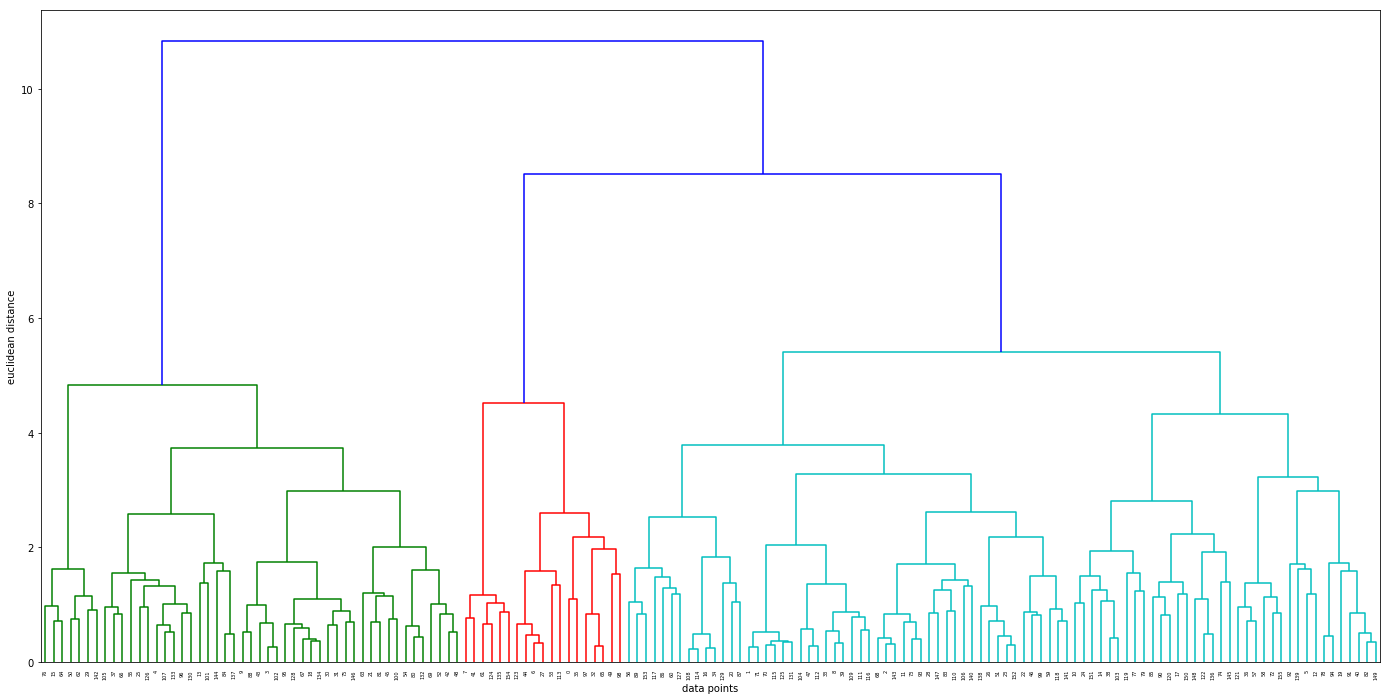

In [25]:

from scipy.cluster.hierarchy import linkage, dendrogram ,cut_tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)
# create naive bayes classifier
gaunb = GaussianNB()

# train classifier with dataset
gaunb = gaunb.fit(Xtrain, Ytrain)

# predict using classifier
predicted = gaunb.predict(Xtest)

cm = confusion_matrix(Ytest,predicted)
print(cm)
accuracy = accuracy_score(Ytest,predicted)
print(accuracy)
merg = linkage(Xtrain,method="ward")
cut_tree(n_clusters=2,Z=merg)
plt.figure(figsize=[24,12])
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

---> Naive Bayes Classifier algoritması K-NN algoritması ile karışlaştırdığımızda zayıf kalmasına rağmen K-means'a göre daha iyi sonuç verdi. plt.show() ile Dengdogram tablosu çizdirilmiştir. Yukarıdaki şekil üzerinde gözükmektedir.

## Subtask 4 : Linear Regression



In [26]:
# Train the model using the training sets
# Ytrain2 = Ytrain.replace(to_replace=['M', 'R'], value=[0, 1])
# Ytest2 = Ytest.replace(to_replace=['M', 'R'], value=[0, 1])
# model.fit(Xtrain, Ytrain)

# Make predictions using the testing set
# predicted = model.predict(Ytest)
# print(predicted)
# cm = confusion_matrix(Ytest,predicted)
# print(cm)
# accuracy = accuracy_score(Ytest,predicted)
# print(accuracy)
# ValueError: could not convert string to float: 'M'

---> Bu ödev için verilmiş SONAR datası Linear Regression uygun bir data değildir. Bu verilen datayı plot ettiğimizde açıkça görüleceği üzere süreklilik sağlamadığı için Linear Regression metodu uygulanamaz.

## Subtask 5 : Hiearchical Clustering



---> Yukarıda K-Means'de yaptıklarımızın bir benzerini yaparak verilerimizi train ettik. Labelların idlerine M ve R olarak belirledik. Predict sonuçlarına bakarak accuracy hesapladık.

In [27]:
from sklearn.cluster import AgglomerativeClustering
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)
model = AgglomerativeClustering(n_clusters=2)  
predicted = model.fit_predict(Xtrain)

labels = {"R":1, "M":0}

real = Ytrain.map(lambda x: labels[x])
cm = confusion_matrix(real,predicted)
print(cm)
accuracy = accuracy_score(real,predicted)

print(accuracy)


[[54 28]
 [53 21]]
0.4807692307692308


---> Hiearchical Clustering unsupervised bir method olduğu için supervised olan metodlara oranla görülebileceği üzere düşük bir sonuç vermişt.r

## Subtask 6 : Logistic Regression



---> Yuarkıda yaptığımız benzer işlemler ile çalışmaktadır.

In [28]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)
classifier = LogisticRegression(random_state=0)
classifier.fit(Xtrain, Ytrain)
y_pred = classifier.predict(Xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(Xtest, Ytest)))


[[26  2]
 [ 6 18]]
Accuracy of logistic regression classifier on test set: 0.85


---> Logistic regression classifier degil, probability estimator oldugu icin accuracy degerimiz iyi bir sonuc verdi.